In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 726.3 kB/s eta 0:00:00


In [29]:
!pip install squarify

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# IMPORT LIBRARY

In [32]:
import pandas as pd
import re
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import csv
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import squarify
from collections import Counter
import matplotlib.pyplot as plt

# Loading Dataset

In [4]:
#akan menampilkan 5 baris pertama dari Dataframe tersebut.
df = pd.read_csv("https://raw.githubusercontent.com/deayulianis/Proyek-Analisis-Sentimen/refs/heads/main/ulasan_tiktok.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9f293c6a-953f-4476-9f2c-6d65d8a4f939,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolong pihak tiktok dari tadi saya donload men...,2,0,39.4.3,2025-04-12 10:01:19,NaN,NaN,39.4.3
1,be33729a-97da-44a7-8607-cc5ff3c5a7f1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baik sekali,5,0,NaN,2025-04-12 09:59:52,NaN,NaN,NaN
2,51d6608a-88a8-4ba6-acd8-9d836e842a4f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"gw bingung sama tiktok, komentar yg bener di A...",1,0,NaN,2025-04-12 09:59:43,NaN,NaN,NaN
3,a1db1f60-4efc-4c38-a272-cb7f26da354d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"baguss bangett ihh, adaa ajaa inspirasi baruu ...",5,0,39.3.3,2025-04-12 09:57:35,NaN,NaN,39.3.3
4,fff6f5eb-1990-4537-b994-0326044e7a32,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon di perbaiki lagi soal nya saya donlod su...,3,0,NaN,2025-04-12 09:56:14,NaN,NaN,NaN


In [5]:
# Menampilkan informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  5951 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          4 non-null      object
 9   repliedAt             4 non-null      object
 10  appVersion            5951 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [6]:
# Menangani Missing Values
# Ganti NaN di kolom 'reviewCreatedVersion' & 'appVersion' dengan "Unknown"
df['reviewCreatedVersion'].fillna("Unknown", inplace=True)
df['appVersion'].fillna("Unknown", inplace=True)

# Untuk kolom replyContent & repliedAt yang jarang terisi, bisa dibiarkan atau diisi kosong string
df['replyContent'].fillna("", inplace=True)
df['repliedAt'].fillna("", inplace=True)

/tmp/ipython-input-6-263119930.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviewCreatedVersion'].fillna("Unknown", inplace=True)
/tmp/ipython-input-6-263119930.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [7]:
# Mengecek informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  10000 non-null  object
 7   at                    10000 non-null  object
 8   replyContent          10000 non-null  object
 9   repliedAt             10000 non-null  object
 10  appVersion            10000 non-null  object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


*Dataset suddah bersih dari Missing Values*

# Preprocessing Text

In [8]:
# 1. Cleaning
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # hashtag
    text = re.sub(r'RT[\s]+', '', text)        # RT
    text = re.sub(r"http\S+", '', text)        # links
    text = re.sub(r'[0-9]+', '', text)         # angka
    text = re.sub(r'[^\w\s]', '', text)        # karakter selain huruf/angka
    text = text.replace('\n', ' ')             # baris baru jadi spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = text.strip()
    return text

# 2. Case folding
def casefoldingText(text):
    return text.lower()

# 3. Ganti kata slang
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar",
    "bgt": "banget", "maks": "maksimal", "ga": "tidak", "gak": "tidak", "dpt": "dapat",
    "bkn": "bukan", "tdk": "tidak", "sm": "sama", "jg": "juga"
    # tambahkan lainnya sesuai kebutuhan
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)

# 4. Tokenizing (pakai RegexpTokenizer biar aman)
def tokenizingText(text):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

# 5. Stopword removal
def filteringText(text):
    stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))
    tambahan = ['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy']
    stop_words.update(tambahan)
    return [word for word in text if word not in stop_words]

# 6. Stemming
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    return ' '.join([stemmer.stem(word) for word in words])

# 7. Balik token jadi kalimat
def toSentence(words):
    return ' '.join(words)


In [9]:
# Preprocessing pipeline
df['text_clean'] = df['content'].apply(cleaningText)
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
df['text_stemming'] = df['text_stopword'].apply(lambda x: stemmingText(' '.join(x)))
df['text_akhir'] = df['text_stemming'].apply(lambda x: toSentence(x.split()))

In [10]:
df['text_akhir'].head(10)  # 10 data teratas hasil akhir preprocessing

,text_akhir
0,tolong tiktok donload menginstal mulu selesai ...
1,
2,gw bingung tiktok komentar yg bener apus gilir...
3,baguss bangett ihh adaa ajaa inspirasi baruu d...
4,mohon baik donlod menginstal masuk aplikasi
5,si tiktok blokir akun gua gua kecewa guwa uda ...
6,akun tiktok blokir tiktok laku langgar sdh coba
7,kalu apdet susah banget udah coba berkalikali ...
8,bru update update lgi yg bner aja
9,suka


# Pelabelan

In [11]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Gagal mengambil data kata positif")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Gagal mengambil data kata negatif")

# Fungsi analisis sentimen
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score -= lexicon_negative[word]

    if score > 3:
        polarity = 'positive'
    elif score < 3:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity


In [12]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))  # Memisahkan hasil score dan label

df['polarity_score'] = results[0]
df['polarity'] = results[1]

In [13]:
print(df['polarity'].value_counts())
print(df[['text_stopword', 'polarity_score', 'polarity']].head())

polarity
positive    7211
negative    2340
neutral      449
Name: count, dtype: int64
                                       text_stopword  polarity_score  polarity
0  [tolong, tiktok, donload, menginstal, mulu, se...              24  positive
1                                                 []               0  negative
2  [gw, bingung, tiktok, komentar, yg, bener, apu...              14  positive
3  [baguss, bangett, ihh, adaa, ajaa, inspirasi, ...              10  positive
4  [mohon, perbaiki, donlod, menginstal, masuk, a...              11  positive


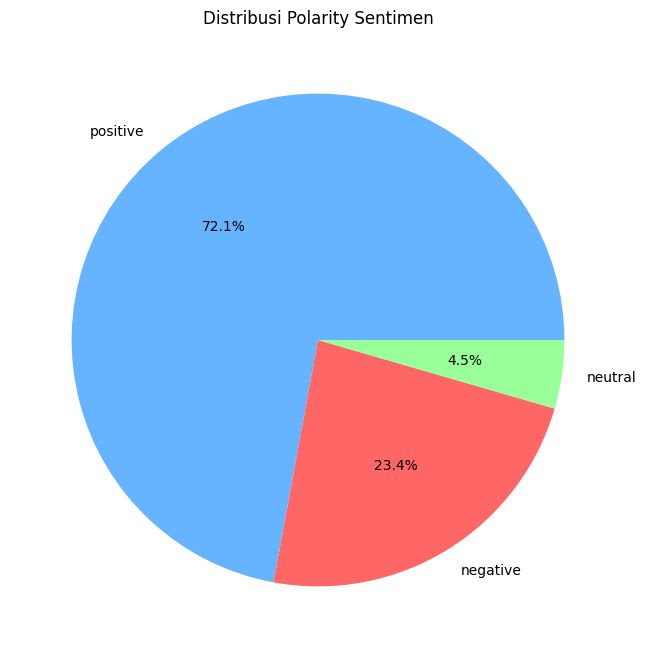

In [14]:
# Menghitung jumlah setiap kategori polarity
polarity_counts = df['polarity'].value_counts()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff6666','#99ff99'])
plt.title('Distribusi Polarity Sentimen')
plt.show()

# Eksplorasi Label

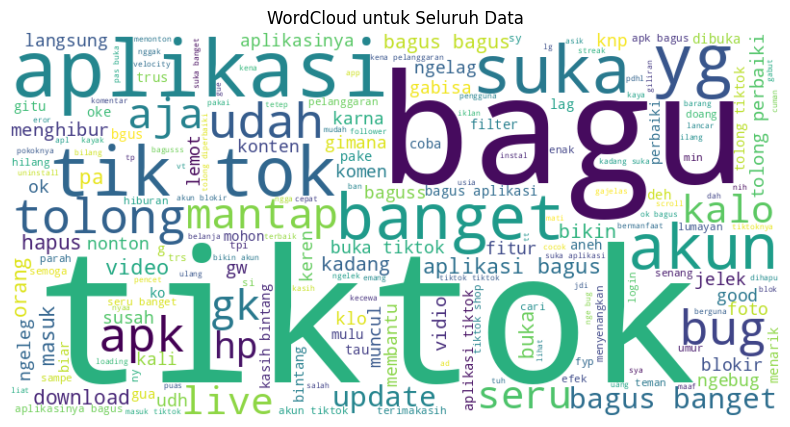

In [15]:
# 1. WordCloud secara umum (untuk seluruh teks)
# Mengubah list menjadi string dengan menggabungkan kata-kata dalam setiap baris
all_text = ' '.join([' '.join(text) for text in df['text_stopword']])

# Membuat WordCloud
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Seluruh Data')
plt.show()

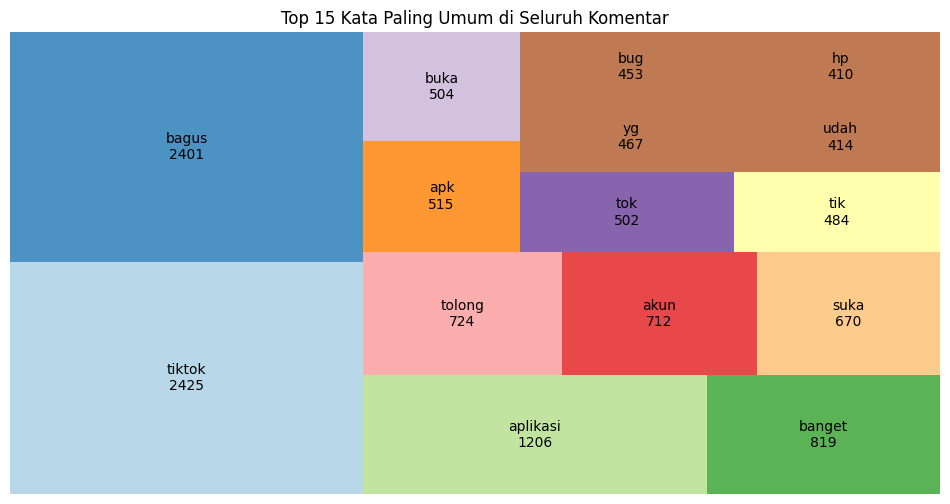

In [39]:
# Gabungkan semua kata dari seluruh komentar
all_words = [word for text in df['text_stopword'] for word in text]

# Hitung frekuensi 15 kata paling umum
word_counts = Counter(all_words).most_common(15)

# Siapkan data untuk squarify
labels = [f"{word}\n{count}" for word, count in word_counts]
sizes = [count for word, count in word_counts]
colors = plt.cm.Paired(range(len(sizes)))  # pewarnaan otomatis

# Plot Treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title("Top 15 Kata Paling Umum di Seluruh Komentar")
plt.axis('off')
plt.show()

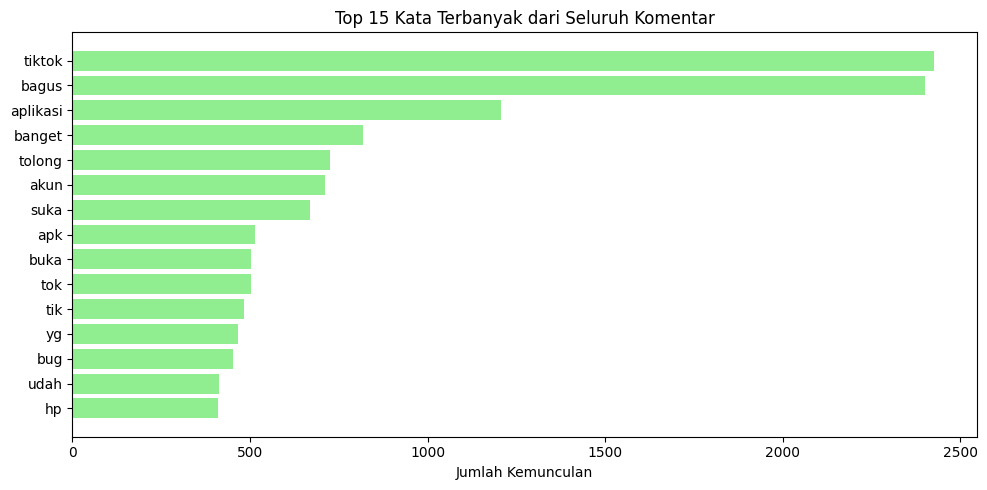

In [46]:
from collections import Counter
import matplotlib.pyplot as plt

# Ambil seluruh kata dari semua komentar
all_words = [word for tokens in df['text_stopword'] for word in tokens]

# Hitung frekuensi kata terbanyak (misalnya 20 besar)
all_counts = Counter(all_words).most_common(15)

# Pisahkan kata dan jumlahnya untuk plotting
words_all, counts_all = zip(*all_counts)

# Buat grafik batang horizontal
plt.figure(figsize=(10, 5))
plt.barh(words_all[::-1], counts_all[::-1], color='lightgreen')
plt.title("Top 15 Kata Terbanyak dari Seluruh Komentar")
plt.xlabel("Jumlah Kemunculan")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Word untuk Positive Tweets')

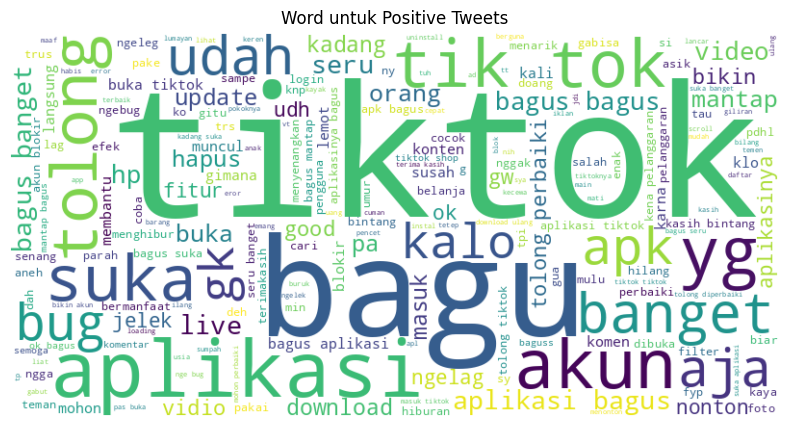

In [36]:
# 2. WordCloud untuk Positive Tweets
positive_text = ' '.join([' '.join(text) for text in df[df['polarity'] == 'positive']['text_stopword']])

# Membuat WordCloud untuk Positive Tweets
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Menampilkan WordCloud Positive
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word untuk Positive Tweets')

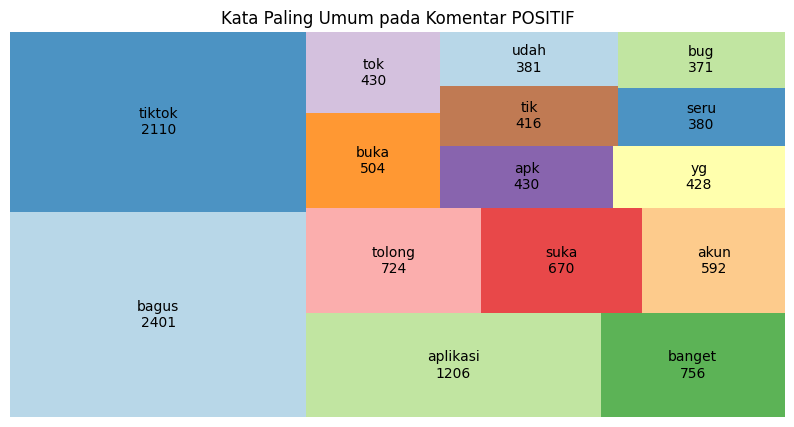

In [33]:
# =====================
# Komentar POSITIF
# =====================
positive_words = [word for text in df[df['polarity'] == 'positive']['text_stopword'] for word in text]
pos_counts = Counter(positive_words).most_common(15)

labels_pos = [f"{word}\n{count}" for word, count in pos_counts]
sizes_pos = [count for word, count in pos_counts]

plt.figure(figsize=(10, 5))
squarify.plot(sizes=sizes_pos, label=labels_pos, alpha=0.8, color=plt.cm.Paired.colors)
plt.axis('off')
plt.title("Kata Paling Umum pada Komentar POSITIF")
plt.show()


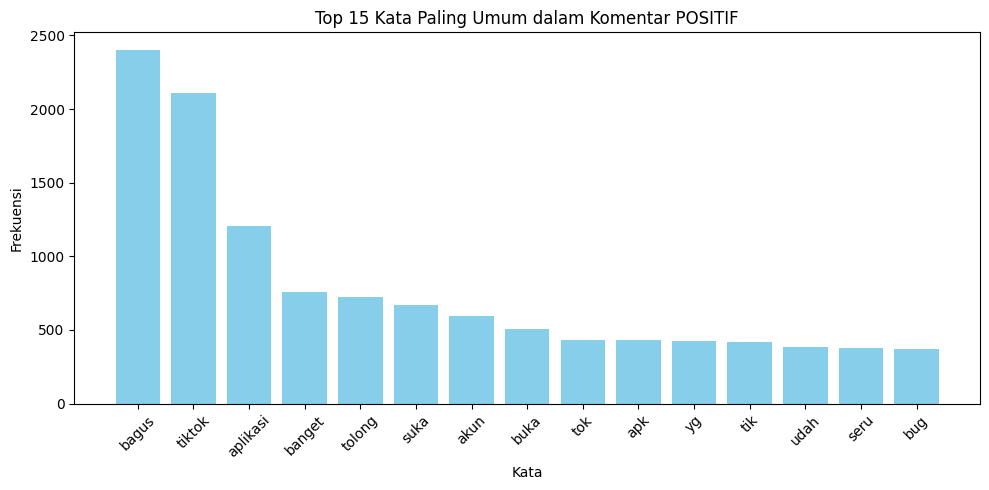

In [44]:
from collections import Counter
import matplotlib.pyplot as plt

# ===============================
# 1. Grafik Batang - Komentar POSITIF
# ===============================
positive_words = [word for text in df[df['polarity'] == 'positive']['text_stopword'] for word in text]
pos_counts = Counter(positive_words).most_common(15)

words_pos = [word for word, count in pos_counts]
counts_pos = [count for word, count in pos_counts]

plt.figure(figsize=(10, 5))
plt.bar(words_pos, counts_pos, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 15 Kata Paling Umum dalam Komentar POSITIF')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

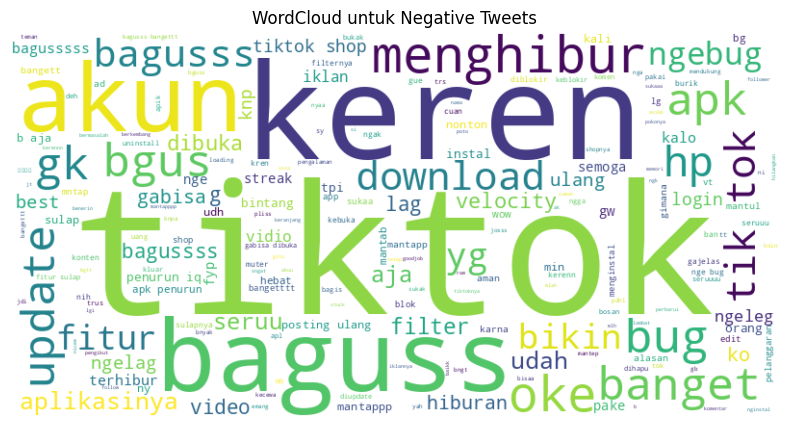

In [17]:
# 3. WordCloud untuk Negative Tweets
negative_text = ' '.join([' '.join(text) for text in df[df['polarity'] == 'negative']['text_stopword']])

# Membuat WordCloud untuk Negative Tweets
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Menampilkan WordCloud Negative
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Negative Tweets')
plt.show()

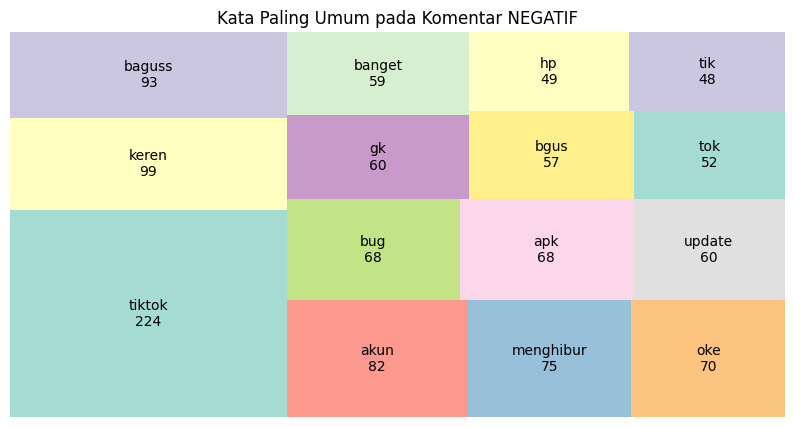

In [34]:
# =====================
# Komentar NEGATIF
# =====================
negative_words = [word for text in df[df['polarity'] == 'negative']['text_stopword'] for word in text]
neg_counts = Counter(negative_words).most_common(15)

labels_neg = [f"{word}\n{count}" for word, count in neg_counts]
sizes_neg = [count for word, count in neg_counts]

plt.figure(figsize=(10, 5))
squarify.plot(sizes=sizes_neg, label=labels_neg, alpha=0.8, color=plt.cm.Set3.colors)
plt.axis('off')
plt.title("Kata Paling Umum pada Komentar NEGATIF")
plt.show()

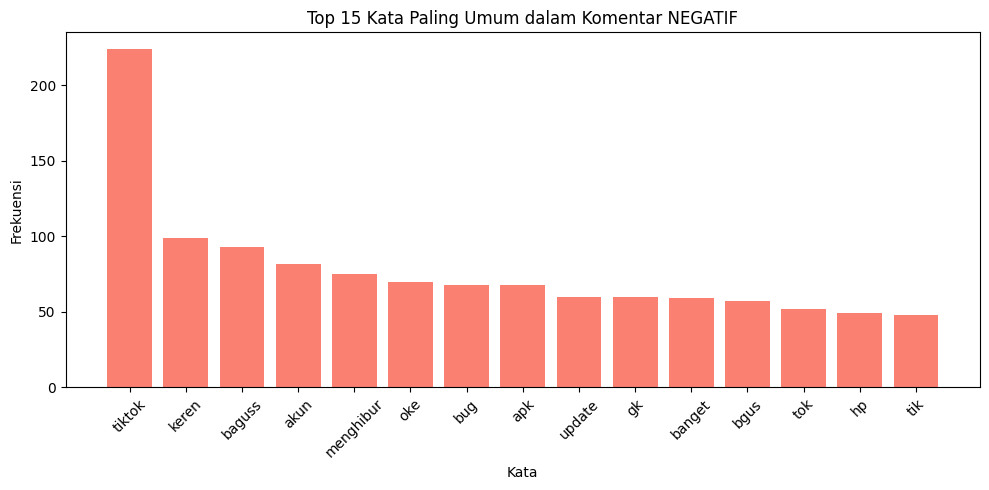

In [38]:
# ===============================
# 2. Grafik Batang - Komentar NEGATIF
# ===============================
negative_words = [word for text in df[df['polarity'] == 'negative']['text_stopword'] for word in text]
neg_counts = Counter(negative_words).most_common(15)

words_neg = [word for word, count in neg_counts]
counts_neg = [count for word, count in neg_counts]

plt.figure(figsize=(10, 5))
plt.bar(words_neg, counts_neg, color='salmon')
plt.xticks(rotation=45)
plt.title('Top 15 Kata Paling Umum dalam Komentar NEGATIF')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

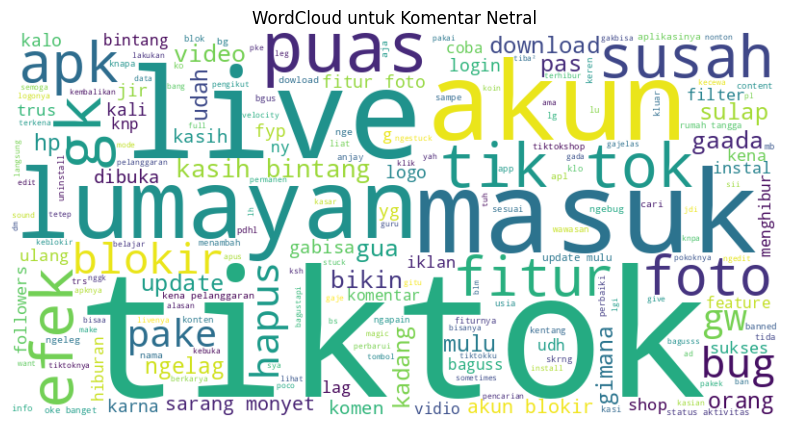

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua kata dari komentar netral
neutral_text = ' '.join([' '.join(tokens) for tokens in df[df['polarity'] == 'neutral']['text_stopword']])

# Buat WordCloud
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Komentar Netral')
plt.show()

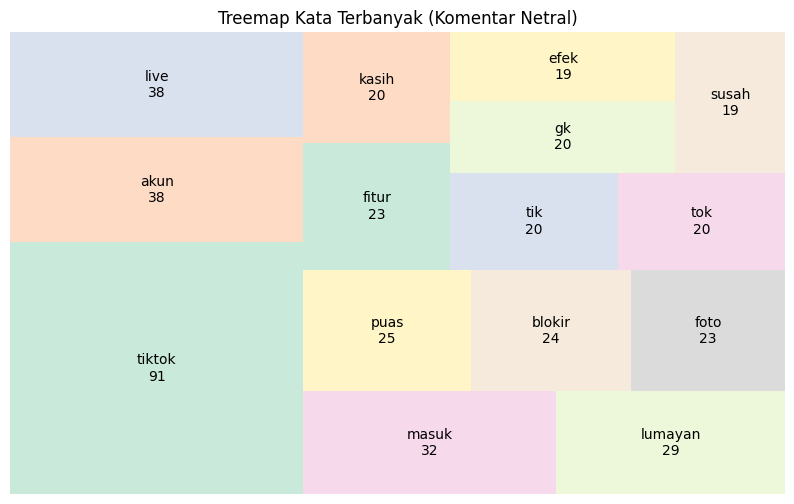

In [48]:
import squarify
from collections import Counter

# Hitung frekuensi kata
neutral_words = [word for tokens in df[df['polarity'] == 'neutral']['text_stopword'] for word in tokens]
neutral_counts = Counter(neutral_words).most_common(15)

# Ambil kata dan jumlah
labels_neutral = [f"{word}\n{count}" for word, count in neutral_counts]
sizes_neutral = [count for word, count in neutral_counts]

# Plot
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes_neutral, label=labels_neutral, alpha=0.7, color=plt.cm.Pastel2.colors)
plt.axis('off')
plt.title("Treemap Kata Terbanyak (Komentar Netral)")
plt.show()

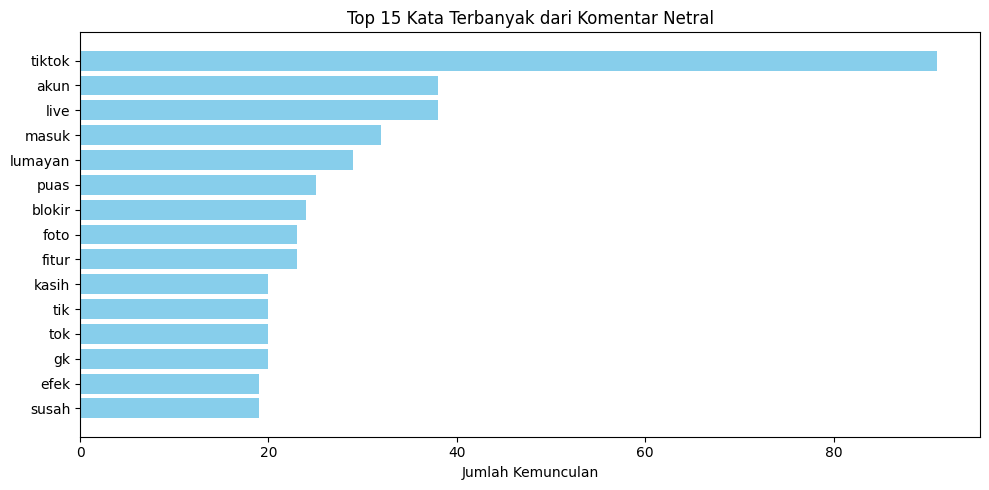

In [49]:
# Ambil kata dan jumlah dari Counter tadi
words_neutral, counts_neutral = zip(*neutral_counts)

# Plot batang horizontal
plt.figure(figsize=(10, 5))
plt.barh(words_neutral[::-1], counts_neutral[::-1], color='skyblue')
plt.title("Top 15 Kata Terbanyak dari Komentar Netral")
plt.xlabel("Jumlah Kemunculan")
plt.tight_layout()
plt.show()

In [50]:
from collections import Counter

# Ambil hanya data positif dan negatif
positive_words = [word for tokens in df[df['polarity'] == 'positive']['text_stopword'] for word in tokens]
negative_words = [word for tokens in df[df['polarity'] == 'negative']['text_stopword'] for word in tokens]
neutral_words = [word for tokens in df[df['polarity'] == 'neutral']['text_stopword'] for word in tokens]

# Hitung frekuensi kata
pos_counts = Counter(positive_words).most_common(15)
neg_counts = Counter(negative_words).most_common(15)
neg_counts = Counter(neutral_words).most_common(15)

# Tampilkan 15 kata terbanyak
print("Kata terbanyak pada komentar POSITIF:")
for word, count in pos_counts:
    print(f"{word}: {count}")

print("\nKata terbanyak pada komentar NEGATIF:")
for word, count in neg_counts:
    print(f"{word}: {count}")

print("\nKata terbanyak pada komentar NEUTRAL:")
for word, count in neg_counts:
    print(f"{word}: {count}")

Kata terbanyak pada komentar POSITIF:
bagus: 2401
tiktok: 2110
aplikasi: 1206
banget: 756
tolong: 724
suka: 670
akun: 592
buka: 504
tok: 430
apk: 430
yg: 428
tik: 416
udah: 381
seru: 380
bug: 371

Kata terbanyak pada komentar NEGATIF:
tiktok: 91
akun: 38
live: 38
masuk: 32
lumayan: 29
puas: 25
blokir: 24
foto: 23
fitur: 23
kasih: 20
tik: 20
tok: 20
gk: 20
efek: 19
susah: 19

Kata terbanyak pada komentar NEUTRAL:
tiktok: 91
akun: 38
live: 38
masuk: 32
lumayan: 29
puas: 25
blokir: 24
foto: 23
fitur: 23
kasih: 20
tik: 20
tok: 20
gk: 20
efek: 19
susah: 19


# Data Splitting dan Ekstraksi Fitur dengan TF-IDF

In [18]:
# Pastikan 'text_stopword' adalah kolom yang berisi list kata-kata. Gabungkan kata-kata menjadi string
X = [' '.join(text) for text in df['text_stopword']]  # Menggabungkan list menjadi string
y = df['polarity']  # Kolom 'polarity' yang berisi label sentimen

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
print("Hasil Ekstraksi Fitur:")
print(features_df.head())

# Bagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(f"\nUkuran Data Latih: {X_train.shape}")
print(f"Ukuran Data Uji: {X_test.shape}")

Hasil Ekstraksi Fitur:
    ad  aja      akun      aman  anak  aneh  apk  apl  aplikasi  aplikasinya  \
0  0.0  0.0  0.000000  0.000000   0.0   0.0  0.0  0.0  0.000000          0.0   
1  0.0  0.0  0.000000  0.000000   0.0   0.0  0.0  0.0  0.000000          0.0   
2  0.0  0.0  0.205267  0.692114   0.0   0.0  0.0  0.0  0.000000          0.0   
3  0.0  0.0  0.000000  0.000000   0.0   0.0  0.0  0.0  0.000000          0.0   
4  0.0  0.0  0.000000  0.000000   0.0   0.0  0.0  0.0  0.366333          0.0   

   ...  umur  uninstall  update  upload  usia  velocity  video  vidio   vt  \
0  ...   0.0        0.0     0.0     0.0   0.0       0.0    0.0    0.0  0.0   
1  ...   0.0        0.0     0.0     0.0   0.0       0.0    0.0    0.0  0.0   
2  ...   0.0        0.0     0.0     0.0   0.0       0.0    0.0    0.0  0.0   
3  ...   0.0        0.0     0.0     0.0   0.0       0.0    0.0    0.0  0.0   
4  ...   0.0        0.0     0.0     0.0   0.0       0.0    0.0    0.0  0.0   

         yg  
0  0.000000  

# Modeling

In [19]:
# 1. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluasi model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression:
Accuracy: 0.904
              precision    recall  f1-score   support

    negative       0.81      0.90      0.85       472
     neutral       0.72      0.29      0.42        72
    positive       0.94      0.94      0.94      1456

    accuracy                           0.90      2000
   macro avg       0.82      0.71      0.73      2000
weighted avg       0.90      0.90      0.90      2000



In [20]:
print("Logistic Regression: Accuracy = 90.4%")

Logistic Regression: Accuracy = 90.4%


In [21]:
# 2. Support Vector Machine (SVM)
svm = SVC(kernel='linear')  # Coba dengan kernel linear
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluasi model
print("\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM):
Accuracy: 0.908
              precision    recall  f1-score   support

    negative       0.79      0.95      0.86       472
     neutral       0.93      0.19      0.32        72
    positive       0.96      0.93      0.94      1456

    accuracy                           0.91      2000
   macro avg       0.89      0.69      0.71      2000
weighted avg       0.92      0.91      0.90      2000



In [22]:
print("Support Vector Machine (SVM): Accuracy = 90.8%")

Support Vector Machine (SVM): Accuracy = 90.8%


In [23]:
# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluasi model
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.907
              precision    recall  f1-score   support

    negative       0.80      0.91      0.85       472
     neutral       0.64      0.42      0.50        72
    positive       0.95      0.93      0.94      1456

    accuracy                           0.91      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.91      0.91      0.91      2000



In [24]:
print("Random Forest: Accuracy = 90.7%")

Random Forest: Accuracy = 90.7%


In [25]:
with open('requirements.txt', 'w') as f:
    f.write('\n'.join([
        'pandas',
        'nltk',
        'Sastrawi',
        'matplotlib',
        'scikit-learn',
        'requests'
    ]))

In [26]:
!cat requirements.txt

pandas
nltk
Sastrawi
matplotlib
scikit-learn
requests

In [27]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>